## **KASUS 1**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from scipy.stats import mannwhitneyu


# Load dataset
file_path = "Dataeset_Kekuatan_Tangan.xlsx"
xls = pd.ExcelFile(file_path)

# Check nama sheet
xls.sheet_names

['Sheet1']

In [ ]:
# Load data sheet
df_new = pd.read_excel(xls, sheet_name='Sheet1')

# Display first few rows to understand the structure
df_new.head()



,Unnamed: 0,Uji ke-,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,Jenis Kelamin,1,2,3,Rata-Rata Uji Lateral
1,Laki-Laki,46,42,45,44.333333
2,Laki-Laki,55,46,48,49.666667
3,Laki-Laki,45,69,62,58.666667
4,Laki-Laki,72,68,85,75


In [ ]:
# Rename Kolom
df_new.columns = ["Jenis_Kelamin", "Uji_1", "Uji_2", "Uji_3", "Rata_Rata_Uji_Lateral"]

# Remove kolom pertama
df_new = df_new.iloc[1:].reset_index(drop=True)

# Convert numerical columns to float
num_cols = ["Uji_1", "Uji_2", "Uji_3", "Rata_Rata_Uji_Lateral"]
df_new[num_cols] = df_new[num_cols].astype(float)

# Check the number of samples per gender
df_new["Jenis_Kelamin"].value_counts()


,count
Jenis_Kelamin,
Laki-Laki,23
Perempuan,16


In [ ]:
# Set seed for reproducibility
np.random.seed(42)

# Oversample Laki-Laki to reach 28 samples
male_data = df_new[df_new["Jenis_Kelamin"] == "Laki-Laki"]
if len(male_data) < 28:
    male_oversample = male_data.sample(n=28 - len(male_data), replace=True, random_state=42)
    male_data = pd.concat([male_data, male_oversample], ignore_index=True)

# Oversample Perempuan to reach 21 samples
female_data = df_new[df_new["Jenis_Kelamin"] == "Perempuan"]
if len(female_data) < 21:
    female_oversample = female_data.sample(n=21 - len(female_data), replace=True, random_state=42)
    female_data = pd.concat([female_data, female_oversample], ignore_index=True)

# Gabungkan kembali dataset yang telah diperbaiki
df_balanced = pd.concat([male_data, female_data], ignore_index=True)

# Periksa kembali jumlah data per kelompok
df_balanced["Jenis_Kelamin"].value_counts()


,count
Jenis_Kelamin,
Laki-Laki,28
Perempuan,21


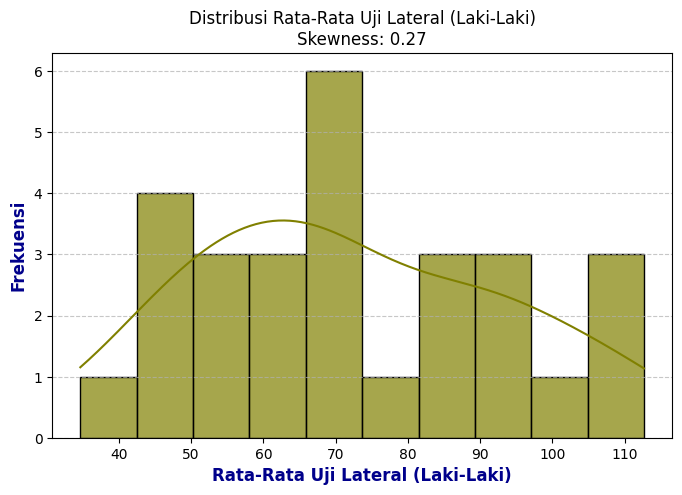

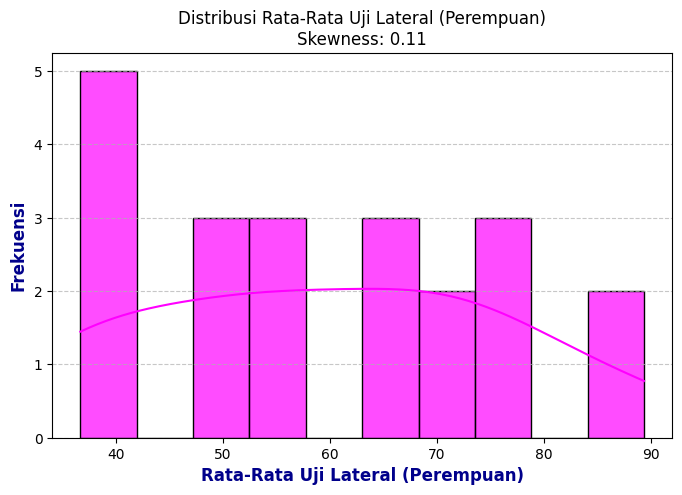

(0.2692293651164319, 0.11193643263371778)

In [ ]:
# Import library seaborn untuk visualisasi
import seaborn as sns

# Menghitung skewness, but only for the 'Rata_Rata_Uji_Lateral' column
skewness_laki = stats.skew(male_data["Rata_Rata_Uji_Lateral"])  # Select the numerical column
skewness_perempuan = stats.skew(female_data["Rata_Rata_Uji_Lateral"])  # Select the numerical column

# Visualisasi histogram dengan kurva distribusi untuk Laki-Laki
plt.figure(figsize=(8,5))
sns.histplot(male_data["Rata_Rata_Uji_Lateral"], bins=10, kde=True, color="olive", edgecolor="black", alpha=0.7)  # Use the numerical column
plt.xlabel("Rata-Rata Uji Lateral (Laki-Laki)", fontsize=12, fontweight="bold", color="darkblue")
plt.ylabel("Frekuensi", fontsize=12, fontweight="bold", color="darkblue")
plt.title(f"Distribusi Rata-Rata Uji Lateral (Laki-Laki)\nSkewness: {skewness_laki:.2f}")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Visualisasi histogram dengan kurva distribusi untuk Perempuan
plt.figure(figsize=(8,5))
sns.histplot(female_data["Rata_Rata_Uji_Lateral"], bins=10, kde=True, color="magenta", edgecolor="black", alpha=0.7)  # Use the numerical column
plt.xlabel("Rata-Rata Uji Lateral (Perempuan)", fontsize=12, fontweight="bold", color="darkblue")
plt.ylabel("Frekuensi", fontsize=12, fontweight="bold", color="darkblue")
plt.title(f"Distribusi Rata-Rata Uji Lateral (Perempuan)\nSkewness: {skewness_perempuan:.2f}")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Menampilkan nilai skewness untuk kedua distribusi
skewness_laki, skewness_perempuan

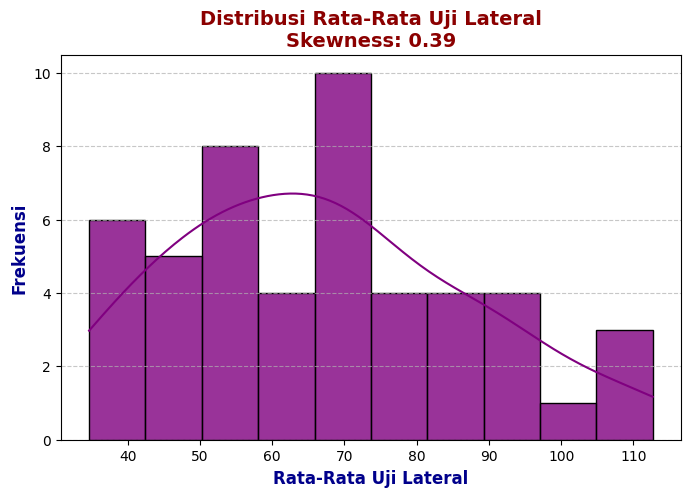

0.3893412700769194

In [ ]:
# Menghitung skewness untuk data gabungan laki-laki dan perempuan
# Only calculate skewness for the 'Rata_Rata_Uji_Lateral' column
skewness_new = stats.skew(df_balanced["Rata_Rata_Uji_Lateral"])

# Visualisasi histogram dengan warna menarik
plt.figure(figsize=(8,5))
# Use the 'Rata_Rata_Uji_Lateral' column for the histogram
sns.histplot(df_balanced["Rata_Rata_Uji_Lateral"], bins=10, kde=True, color="purple", edgecolor="black", alpha=0.8)
plt.xlabel("Rata-Rata Uji Lateral", fontsize=12, fontweight="bold", color="darkblue")
plt.ylabel("Frekuensi", fontsize=12, fontweight="bold", color="darkblue")
plt.title(f"Distribusi Rata-Rata Uji Lateral\nSkewness: {skewness_new:.2f}", fontsize=14, fontweight="bold", color="darkred")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Menampilkan nilai skewness
skewness_new

<ipython-input-19-16177f779e76>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Jenis Kelamin', y='Rata_Rata_Uji_Lateral', data=combined_data, palette=colors)


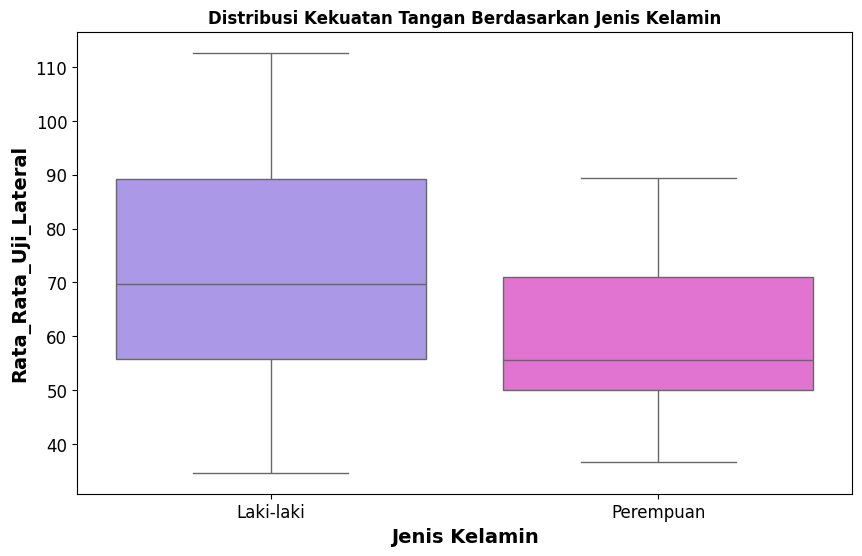

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Ambil palet "husl" dengan 8 warna,
colors = sns.color_palette("husl", 8)[6:8]  # Mengambil warna ke-7 dan ke-8

# Gabungkan data dan tambahkan kolom grup
male_data['Jenis Kelamin'] = 'Laki-laki'  # Menambahkan kolom 'Group' ke male_data
female_data['Jenis Kelamin'] = 'Perempuan' # Menambahkan kolom 'Group' ke female_data
combined_data = pd.concat([male_data, female_data], ignore_index=True)  # Menggabungkan data

# Membuat boxplot dengan warna dari Grup 7 & 8
plt.figure(figsize=(10, 6))
sns.boxplot(x='Jenis Kelamin', y='Rata_Rata_Uji_Lateral', data=combined_data, palette=colors)
plt.xlabel("Jenis Kelamin", fontsize=14, weight='bold')
plt.ylabel("Rata_Rata_Uji_Lateral",fontsize=14, weight='bold')

# Memberi label
plt.title("Distribusi Kekuatan Tangan Berdasarkan Jenis Kelamin", fontsize=12, fontweight="bold")
plt.xticks(fontsize=12)  # Perbesar angka pada sumbu x
plt.yticks(fontsize=12)  # Perbesar angka pada sumbu y

# Menampilkan plot
plt.show()

In [ ]:
# Pisahkan data berdasarkan jenis kelamin
male_data_balanced = df_balanced[df_balanced["Jenis_Kelamin"] == "Laki-Laki"]["Rata_Rata_Uji_Lateral"]
female_data_balanced = df_balanced[df_balanced["Jenis_Kelamin"] == "Perempuan"]["Rata_Rata_Uji_Lateral"]

# Lakukan Mann-Whitney U Test setelah perbaikan data
stat_balanced, p_value_balanced = mannwhitneyu(male_data_balanced, female_data_balanced, alternative='two-sided')

# Tampilkan hasil uji statistik setelah perbaikan
stat_balanced, p_value_balanced


(387.0, 0.06158677264527341)

## **KASUS 2**

In [ ]:
import pandas as pd

# Load the dataset
file_path = "Density_Traveler 2025.xlsx"
xls = pd.ExcelFile(file_path)

# Display sheet names to understand the structure of the dataset
xls.sheet_names


['Sheet1 (2)']

In [ ]:
# Load the data from the identified sheet
df = pd.read_excel(xls, sheet_name='Sheet1 (2)')

# Display the first few rows of the dataset to understand its structure
df.head()


,Unnamed: 0,Number exit from Sudirman Station between 7.00am to 8.00am,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Number exit Velocity exit from Sudirman Station between 9.00am to 10.00am,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Minutes,Tap Gate 1,Tap Gate 2,Tap Gate 3,Total,NaN,NaN,Minutes,Tap Gate 1,Tap Gate 2,Tap Gate 3,Total
2,NaN,NaN,People/Min,People/Min,People/Min,People/Min,NaN,NaN,NaN,People/Min,People/Min,People/Min,People/Min
3,NaN,1,129,83,0,212,NaN,NaN,1,109,92,48,249
4,NaN,2,128,87,0,215,NaN,NaN,2,17,90,114,221


In [ ]:
# Membersihkan dataset

# Mengambil data yang relevan berdasarkan struktur yang terlihat
df_cleaned = df.iloc[3:].reset_index(drop=True)  # Menghapus baris yang tidak relevan
df_cleaned.columns = [
    "Index", "Minute", "Tap Gate 1 (7-8 AM)", "Tap Gate 2 (7-8 AM)", "Tap Gate 3 (7-8 AM)", "Total (7-8 AM)",
    "Unused1", "Unused2", "Minute_2", "Tap Gate 1 (9-10 AM)", "Tap Gate 2 (9-10 AM)", "Tap Gate 3 (9-10 AM)", "Total (9-10 AM)"
]

# Menghapus kolom yang tidak diperlukan
df_cleaned = df_cleaned.drop(columns=["Index", "Unused1", "Unused2", "Minute_2"])

# Konversi data ke tipe numerik
df_cleaned = df_cleaned.apply(pd.to_numeric, errors='coerce')

# Menampilkan data yang sudah dibersihkan
df_cleaned.head()


,Minute,Tap Gate 1 (7-8 AM),Tap Gate 2 (7-8 AM),Tap Gate 3 (7-8 AM),Total (7-8 AM),Tap Gate 1 (9-10 AM),Tap Gate 2 (9-10 AM),Tap Gate 3 (9-10 AM),Total (9-10 AM)
0,1.0,129.0,83.0,0.0,212.0,109.0,92.0,48.0,249.0
1,2.0,128.0,87.0,0.0,215.0,17.0,90.0,114.0,221.0
2,3.0,135.0,92.0,0.0,227.0,8.0,79.0,88.0,175.0
3,4.0,116.0,87.0,0.0,203.0,105.0,14.0,18.0,137.0
4,5.0,25.0,35.0,0.0,60.0,76.0,3.0,0.0,79.0


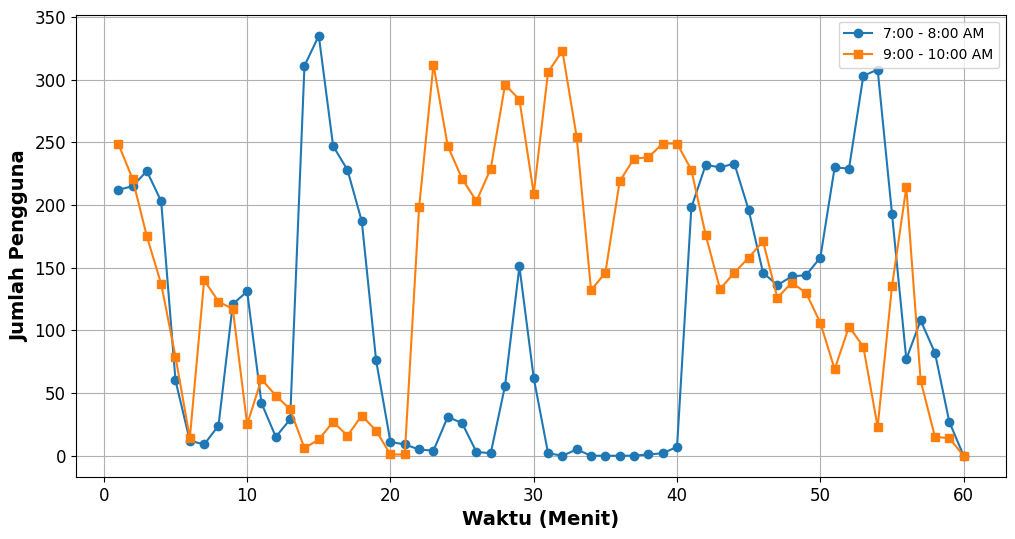

In [ ]:
import matplotlib.pyplot as plt

# Visualisasi distribusi pengguna MRT dalam dua rentang waktu
plt.figure(figsize=(12, 6))

# Plot data 7-8 AM
plt.plot(df_cleaned["Minute"], df_cleaned["Total (7-8 AM)"], label="7:00 - 8:00 AM", marker='o')

# Plot data 9-10 AM
plt.plot(df_cleaned["Minute"], df_cleaned["Total (9-10 AM)"], label="9:00 - 10:00 AM", marker='s')

# Menambahkan label dan judul
plt.xlabel("Waktu (Menit)", fontsize=14, weight='bold')
plt.ylabel("Jumlah Pengguna",fontsize=14, weight='bold')
plt.xticks(fontsize=12)  # Perbesar angka pada sumbu x
plt.yticks(fontsize=12)  # Perbesar angka pada sumbu y


plt.legend()
plt.grid(True)

# Menampilkan plot
plt.show()


In [ ]:
from scipy.stats import shapiro

# Uji normalitas untuk distribusi pengguna MRT pada dua rentang waktu
stat_7_8, p_7_8 = shapiro(df_cleaned["Total (7-8 AM)"].dropna())
stat_9_10, p_9_10 = shapiro(df_cleaned["Total (9-10 AM)"].dropna())

# Menampilkan hasil uji normalitas
p_7_8, p_9_10


(1.2786265458245219e-16, 7.901046344130819e-17)

In [ ]:
from scipy.stats import wilcoxon

# Uji Wilcoxon Signed-Rank Test
wilcoxon_stat, p_value_wilcoxon = wilcoxon(df_cleaned["Total (7-8 AM)"], df_cleaned["Total (9-10 AM)"])

# Menampilkan hasil uji Wilcoxon
wilcoxon_stat, p_value_wilcoxon


(nan, nan)

In [ ]:
# Memeriksa apakah ada nilai NaN dalam dataset
df_cleaned.isna().sum()


,0
Minute,4
Tap Gate 1 (7-8 AM),3
Tap Gate 2 (7-8 AM),3
Tap Gate 3 (7-8 AM),3
Total (7-8 AM),3
Tap Gate 1 (9-10 AM),3
Tap Gate 2 (9-10 AM),3
Tap Gate 3 (9-10 AM),3
Total (9-10 AM),3


In [ ]:
# Menghapus baris dengan nilai NaN
df_cleaned = df_cleaned.dropna()

# Melakukan kembali uji Wilcoxon
wilcoxon_stat, p_value_wilcoxon = wilcoxon(df_cleaned["Total (7-8 AM)"], df_cleaned["Total (9-10 AM)"])

# Menampilkan hasil uji Wilcoxon
wilcoxon_stat, p_value_wilcoxon


(720.0, 0.2129674568409664)

## **Kasus 3**

In [ ]:
import pandas as pd

# Load the dataset
file_path = "bblr_kecamatan 2025.xlsx"

# Check the sheet names in the Excel file
xls = pd.ExcelFile(file_path)
xls.sheet_names


['Kasus (1)']

In [ ]:
# Load the dataset from the identified sheet
df = pd.read_excel(xls, sheet_name='Kasus (1)')

# Display the first few rows to understand the structure
df.head()


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,Jenis Kelamin,Timur,Pusat,Barat,Utara,Selatan
1,Kecamatan 1,46,42,45,94,73
2,Laki-Laki,55,46,48,56,50
3,Laki-Laki,45,69,62,80,71
4,Laki-Laki,72,68,85,43,32


In [ ]:
# Rename columns properly
df.columns = ["Jenis Kelamin", "Timur", "Pusat", "Barat", "Utara", "Selatan"]

# Drop the first row since it contains header information
df = df.iloc[1:].reset_index(drop=True)

# Convert numerical columns to appropriate data types
for col in ["Timur", "Pusat", "Barat", "Utara", "Selatan"]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Display the cleaned data
df.head()


,Jenis Kelamin,Timur,Pusat,Barat,Utara,Selatan
0,Kecamatan 1,46,42,45,94.0,73.0
1,Laki-Laki,55,46,48,56.0,50.0
2,Laki-Laki,45,69,62,80.0,71.0
3,Laki-Laki,72,68,85,43.0,32.0
4,Laki-Laki,40,30,34,64.0,54.0


<ipython-input-75-5d16c7a8bcb4>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Wilayah', y='Berat Lahir Bayi', data=combined_data, palette=colors)
<ipython-input-75-5d16c7a8bcb4>:14: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x='Wilayah', y='Berat Lahir Bayi', data=combined_data, palette=colors)


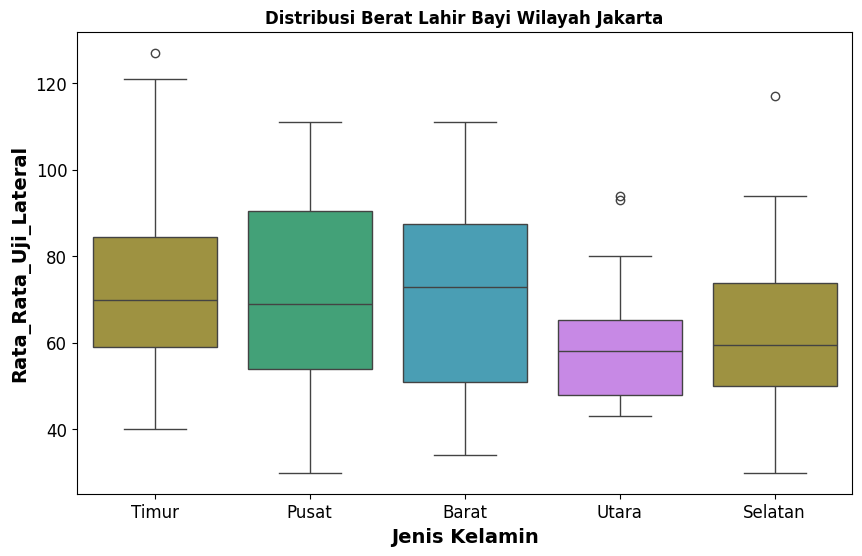

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Ambil palet "husl" dengan 5 warna, lalu gunakan warna ke-1 dan ke-5
colors = sns.color_palette("husl", 5)[1:5]

# Reshape data using melt
combined_data = pd.melt(df, id_vars=['Jenis Kelamin'], value_vars=['Timur', 'Pusat', 'Barat', 'Utara', 'Selatan'],
                        var_name='Wilayah', value_name='Berat Lahir Bayi')

# Membuat boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Wilayah', y='Berat Lahir Bayi', data=combined_data, palette=colors)
plt.xlabel("Jenis Kelamin", fontsize=14, weight='bold')
plt.ylabel("Rata_Rata_Uji_Lateral",fontsize=14, weight='bold')

# Memberi label
plt.title("Distribusi Berat Lahir Bayi Wilayah Jakarta", fontsize=12, fontweight="bold")
plt.xticks(fontsize=12)  # Perbesar angka pada sumbu x
plt.yticks(fontsize=12)  # Perbesar angka pada sumbu y

# Menampilkan plot
plt.show()

In [ ]:
from scipy.stats import shapiro, levene

# Uji Normalitas menggunakan Shapiro-Wilk
normality_results = {col: shapiro(df[col].dropna()) for col in ["Timur", "Pusat", "Barat", "Utara", "Selatan"]}

# Uji Homogenitas Varians menggunakan Levene
levene_test = levene(df["Timur"].dropna(), df["Pusat"].dropna(), df["Barat"].dropna(), df["Utara"].dropna(), df["Selatan"].dropna())

# Menampilkan hasil uji normalitas dan homogenitas varians
normality_results, levene_test


({'Timur': ShapiroResult(statistic=0.9355492949482014, pvalue=0.14412661166462082),
  'Pusat': ShapiroResult(statistic=0.966861499052714, pvalue=0.614362215361712),
  'Barat': ShapiroResult(statistic=0.9517177037053268, pvalue=0.3175270605893773),
  'Utara': ShapiroResult(statistic=0.8708644348478105, pvalue=0.028037188380074882),
  'Selatan': ShapiroResult(statistic=0.9570000476466471, pvalue=0.6078483442207522)},
 LeveneResult(statistic=1.0608340986978726, pvalue=0.3802448277212263))

In [ ]:
from scipy.stats import f_oneway, kruskal

# Uji ANOVA satu arah
anova_test = f_oneway(df["Timur"].dropna(), df["Pusat"].dropna(), df["Barat"].dropna(), df["Utara"].dropna(), df["Selatan"].dropna())

# Uji Kruskal-Wallis (jika diperlukan)
kruskal_test = kruskal(df["Timur"].dropna(), df["Pusat"].dropna(), df["Barat"].dropna(), df["Utara"].dropna(), df["Selatan"].dropna())

# Menampilkan hasil uji ANOVA dan Kruskal-Wallis
anova_test, kruskal_test


(F_onewayResult(statistic=1.419922643127233, pvalue=0.23322121115493682),
 KruskalResult(statistic=5.060922405052965, pvalue=0.2811034050489857))